In [31]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import seaborn as sns
import plotly.express as px

In [2]:
movies = pd.read_csv('Downloads/movies.csv')
movies.head()

,movieId,title,genres,Unnamed: 3
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,NaN
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN
4,5,Father of the Bride Part II (1995),Comedy,NaN


In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movieId     9742 non-null   int64 
 1   title       9742 non-null   object
 2   genres      9742 non-null   object
 3   Unnamed: 3  1 non-null      object
dtypes: int64(1), object(3)
memory usage: 304.6+ KB


In [4]:
ratings = pd.read_csv('Downloads/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [6]:
movies.drop(['Unnamed: 3'], axis = 1, inplace = True) 
#gereksiz sütun silme

In [7]:
# MovieID üzerinden kişilerin yorumlarına film isimlerini ve genrelerini ekliyoruz. 
df = pd.merge(ratings, movies, how='left', on='movieId')

df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [8]:
df.describe()
#Ortalama puan 3.5 ve minimum ve maksimum puan sırasıyla 0.5 ve 5'tir.
#193609 film için oy vermiş 610 kullanıcı vardır.

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [9]:
df.isnull().values.any()          #eksik değer yoktur.temiz

False

In [10]:
df1=df.groupby(['title'])[['rating']].sum()

df2 = pd.DataFrame(df.groupby('title')['rating'].mean())

df2['rating_oy_sayisi'] = pd.DataFrame(df.groupby('title')['rating'].count())

df2['total_rating']=df.groupby(['title'])[['rating']].sum()

high_rated =df2.nlargest(20,'rating')

high_rated_total=df2.nlargest(20,'total_rating')

a = df2.nlargest(20, 'rating_oy_sayisi')

df2.head()

,rating,rating_oy_sayisi,total_rating
title,,,
'71 (2014),4.0,1,4.0
'Hellboy': The Seeds of Creation (2004),4.0,1,4.0
'Round Midnight (1986),3.5,2,7.0
'Salem's Lot (2004),5.0,1,5.0
'Til There Was You (1997),4.0,2,8.0


<BarContainer object of 20 artists>

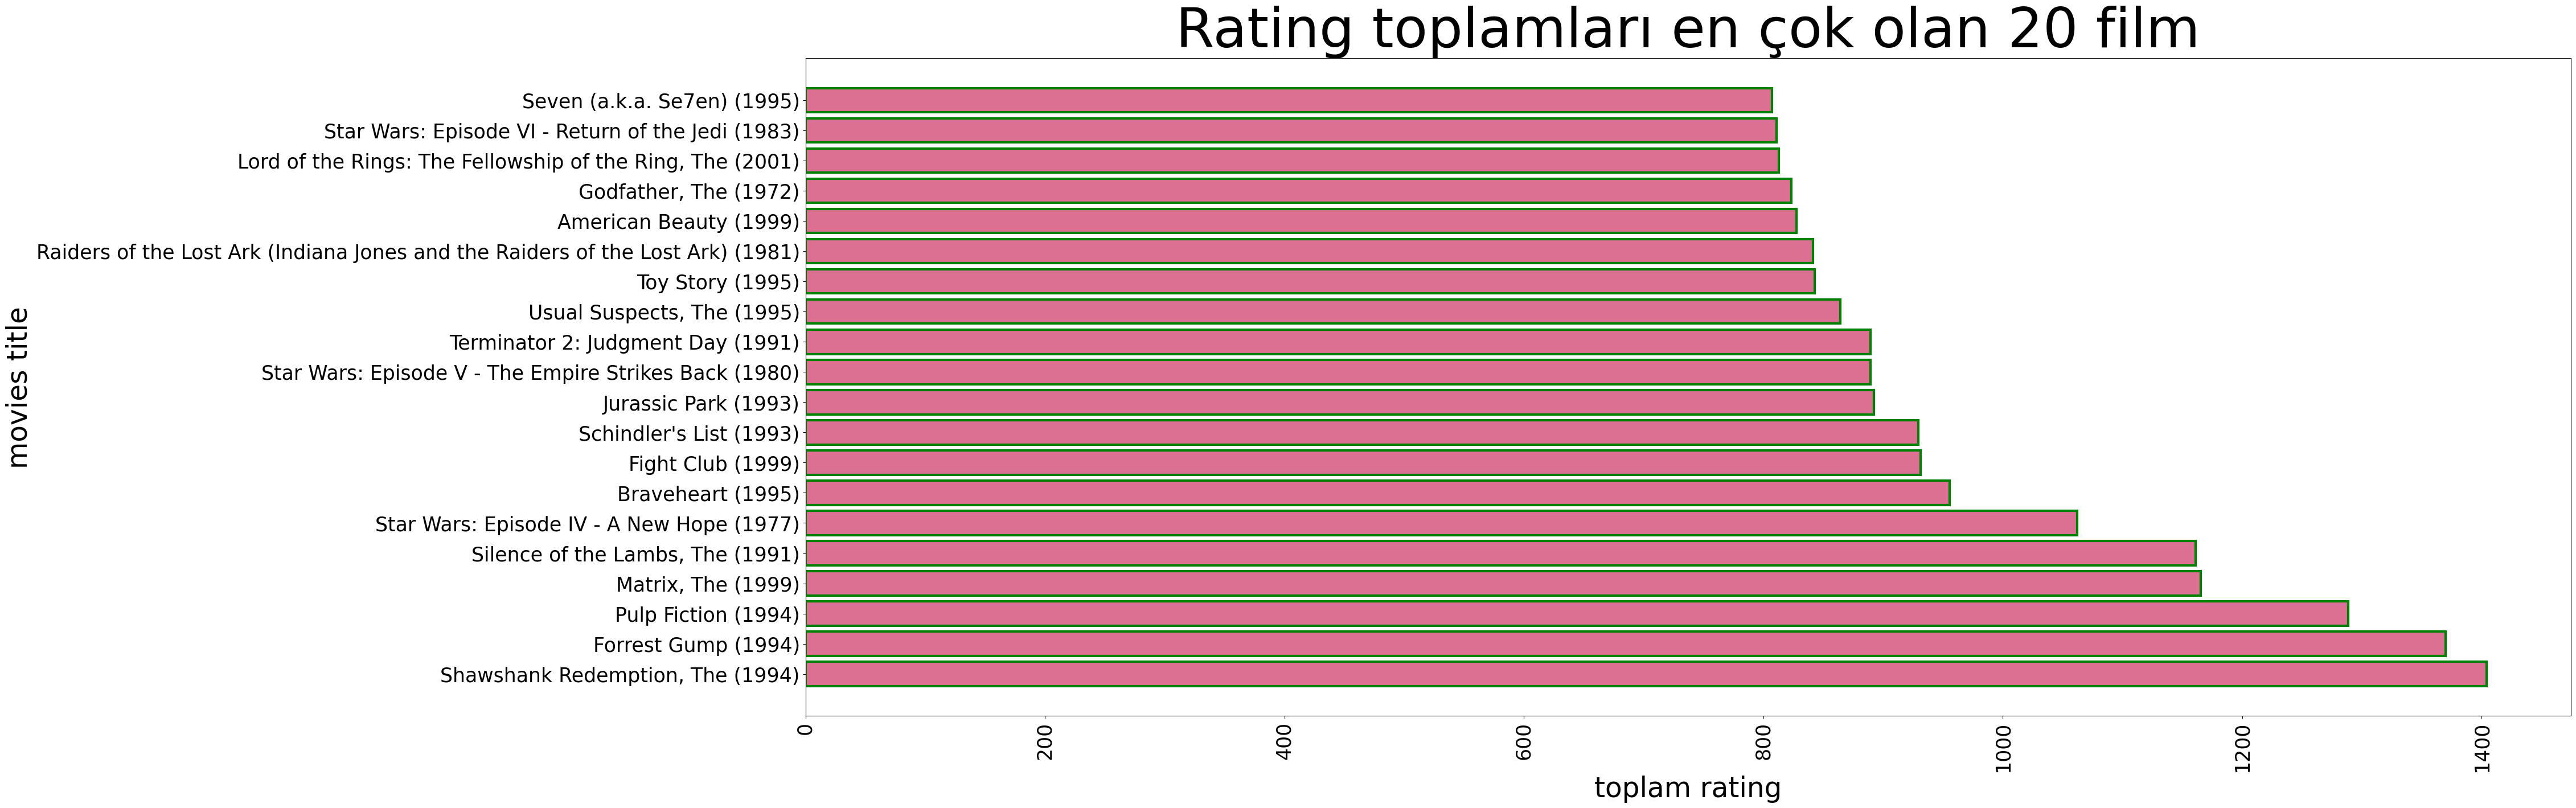

In [11]:
plt.figure(figsize=(40,15))
plt.title('Rating toplamları en çok olan 20 film',fontsize=70)
colors=['#db7093']
plt.ylabel('movies title',fontsize=35)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('toplam rating',fontsize=35)
plt.yticks(fontsize=25)
plt.barh(high_rated_total.index,high_rated_total['total_rating'],linewidth=3,edgecolor='green',color=colors)

<BarContainer object of 20 artists>

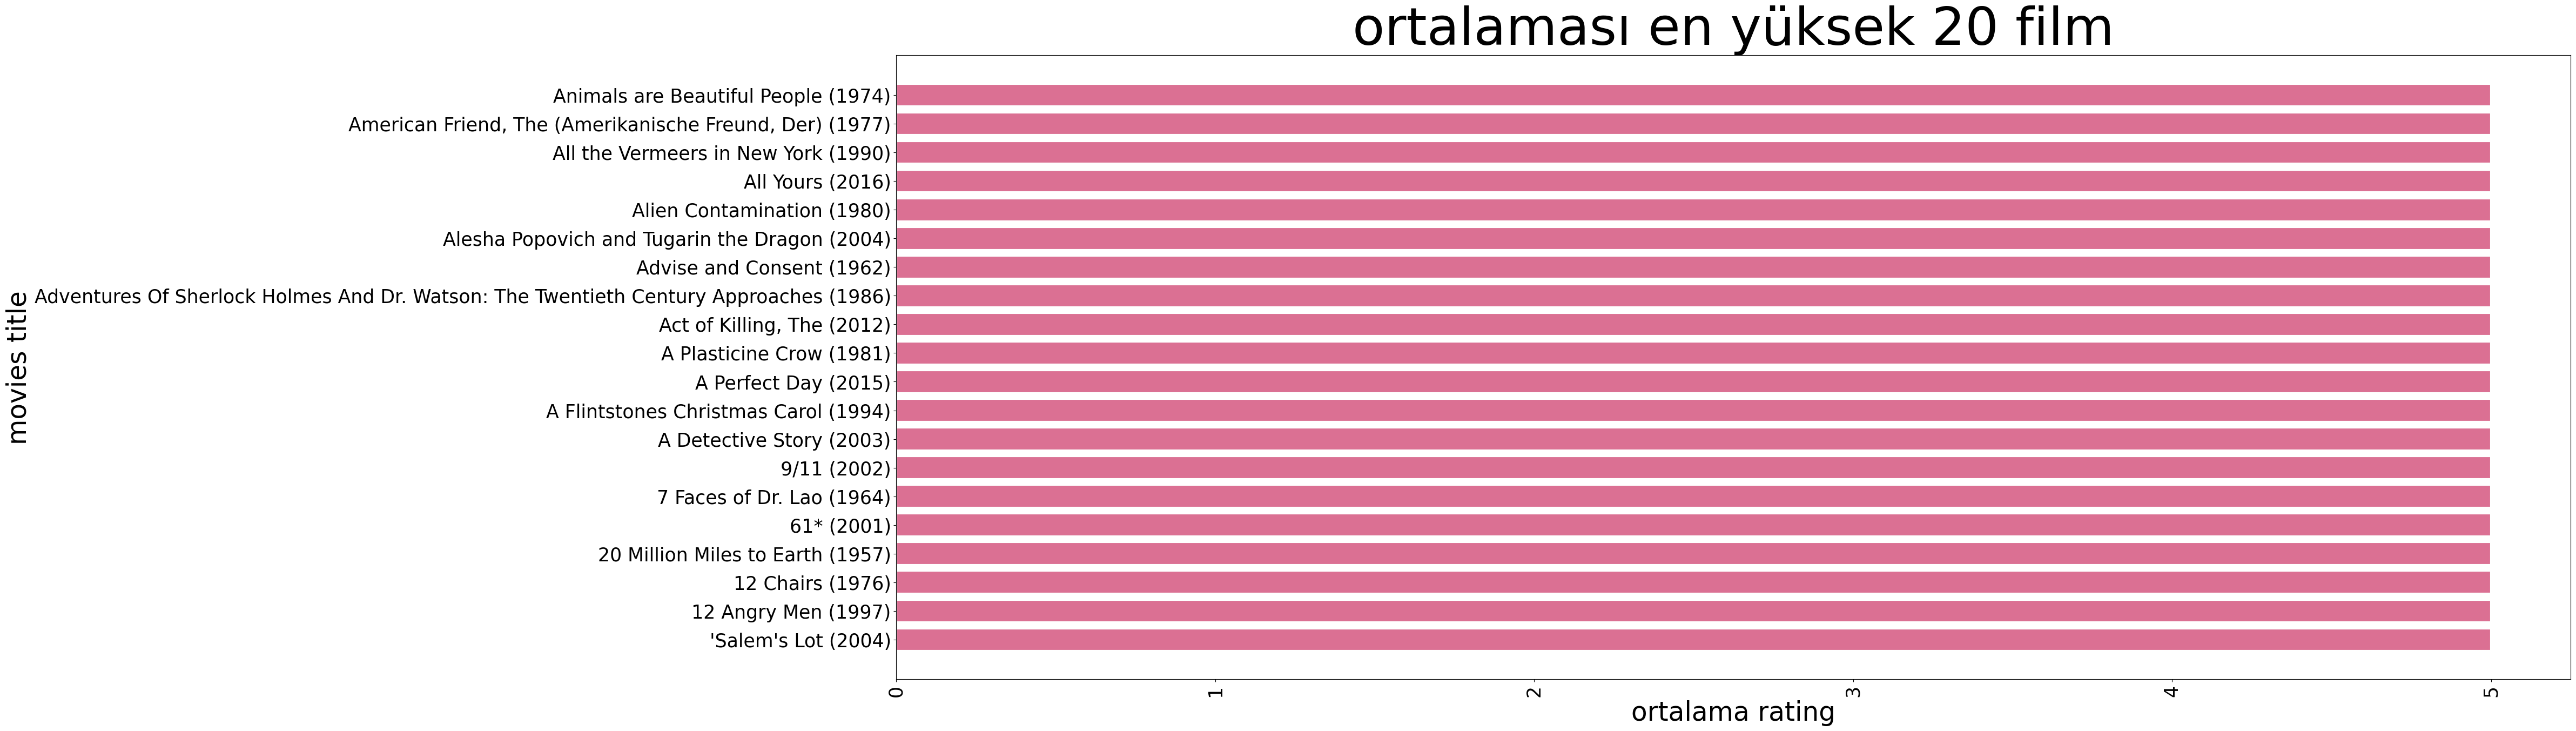

In [12]:
plt.figure(figsize=(40,15))
plt.title('ortalaması en yüksek 20 film',fontsize=70)
colors=['#db7093']
plt.ylabel('movies title',fontsize=35)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('ortalama rating',fontsize=35)
plt.yticks(fontsize=25)
plt.barh(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='white',color=colors)

#filmlere kaç kullanıcının oy verdiği ile de ilgilenilmelidir. tek kişinin oyladığı filmler
#sistemde sorun yaratacaktır.

<BarContainer object of 20 artists>

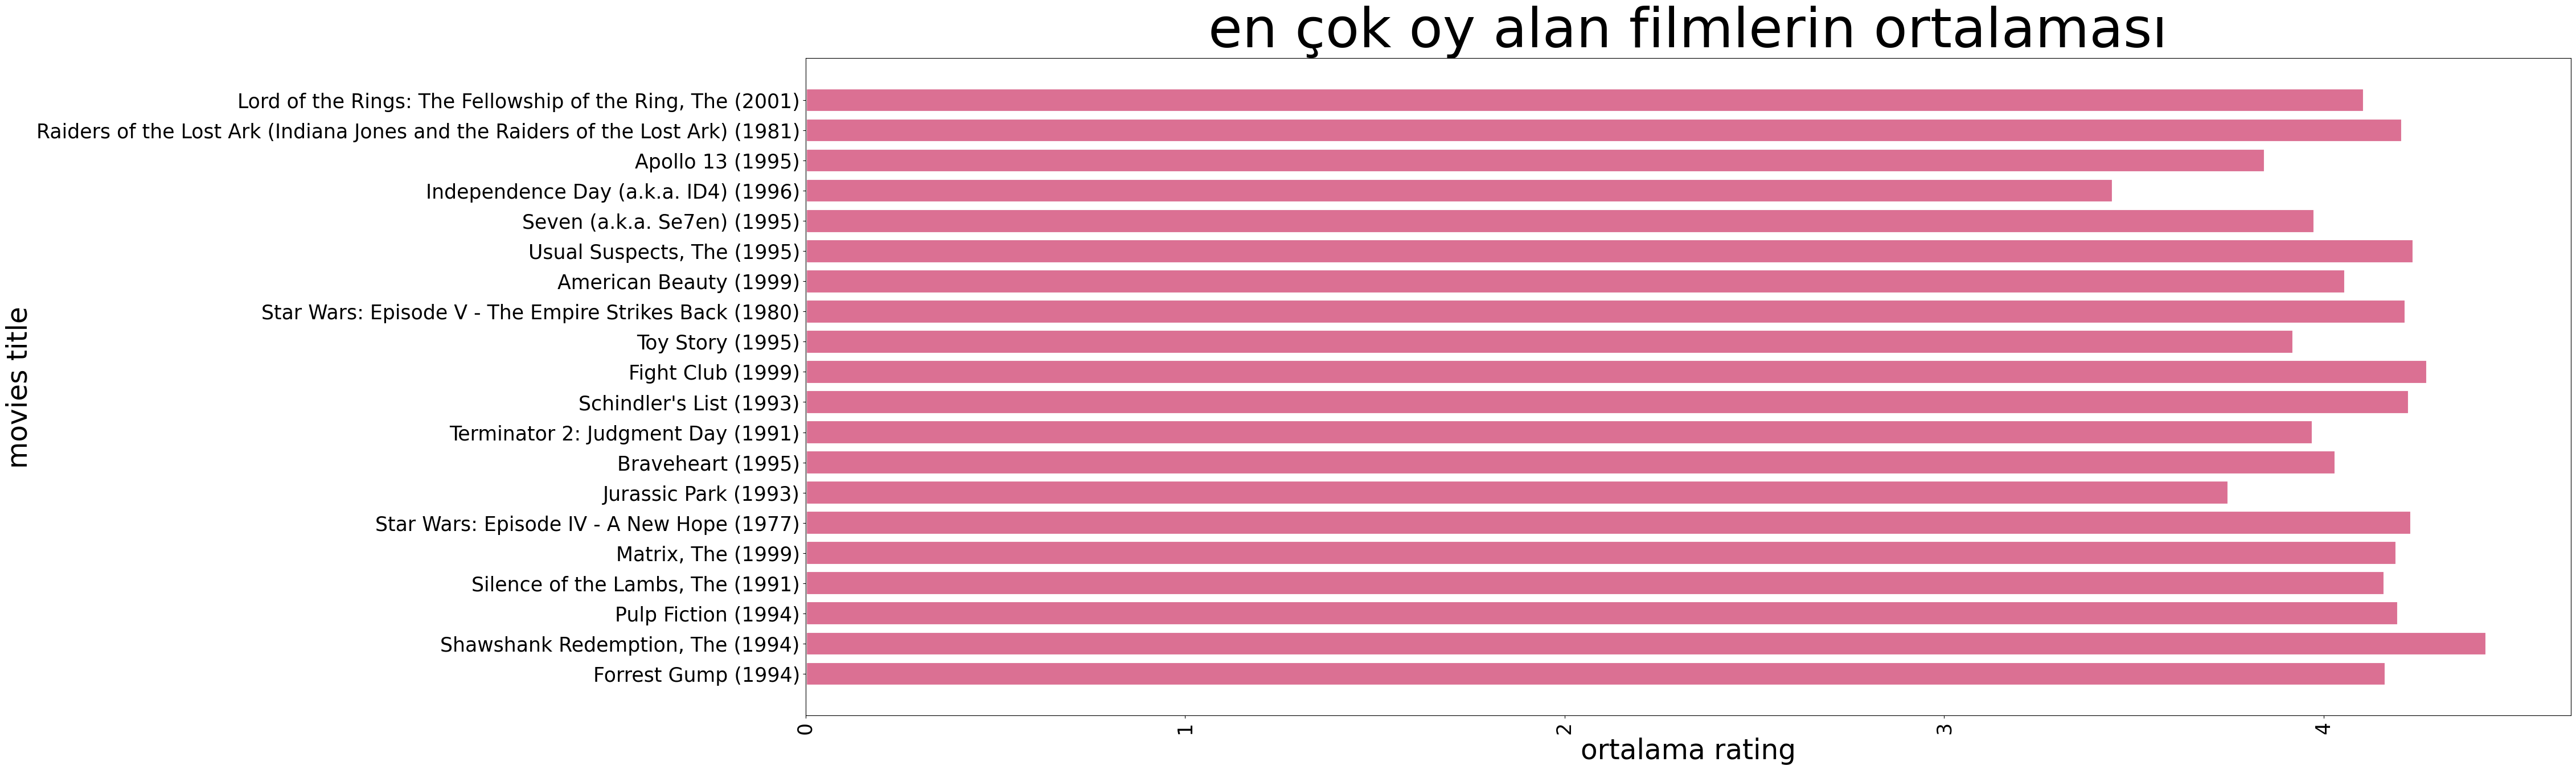

In [13]:
plt.figure(figsize=(40,15))
plt.title('en çok oy alan filmlerin ortalaması',fontsize=70)
colors=['#db7093']
plt.ylabel('movies title',fontsize=35)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('ortalama rating',fontsize=35)
plt.yticks(fontsize=25)
plt.barh(a.index,a['rating'],linewidth=3,edgecolor='white',color=colors)

In [14]:
df3=df.groupby(['genres'])[['rating']].mean()

df3['genres_sıklık'] = pd.DataFrame(df.groupby('genres')['rating'].count())

df3.head()

,rating,genres_sıklık
genres,,
(no genres listed),3.489362,47
Action,2.935484,186
Action|Adventure,3.706306,555
Action|Adventure|Animation,3.583333,42
Action|Adventure|Animation|Children,3.410256,39


In [15]:
maks_tür=df3.nlargest(10,'genres_sıklık')

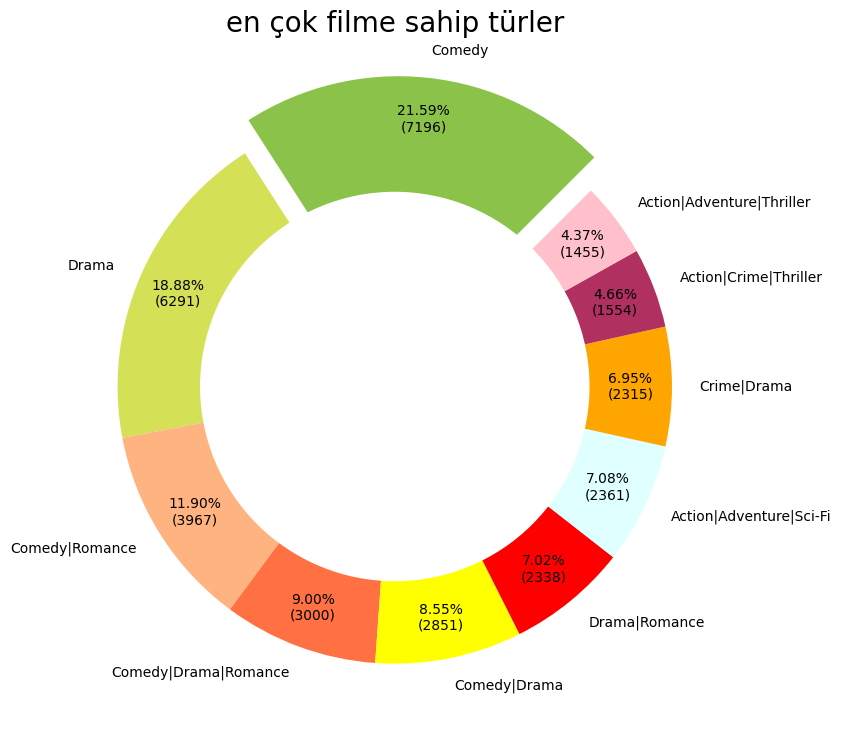

In [16]:
#En fazla filme sahip olan ilk 10 türün Donut Plot grafiği 
#Elimizdeki verilerde en çok 'Comedy' türünde film vardır.

plt.figure(figsize = (9,9))
area = [7196, 6291, 3967, 3000, 2851, 2338, 2361, 2315, 1554, 1455]
labels = ['Comedy', 'Drama', 'Comedy|Romance', 'Comedy|Drama|Romance', 'Comedy|Drama', 'Drama|Romance', 'Action|Adventure|Sci-Fi', 'Crime|Drama', 'Action|Crime|Thriller', 'Action|Adventure|Thriller']
colors = ['#8BC34A', '#D4E157', '#FFB380', '#FF7043', 'yellow', 'red', '#e0ffff', 'orange', '#b03060', 'pink']
total = np.sum(area)

def val_per(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)

plt.pie(area, labels = labels, colors = colors, startangle = 45, pctdistance = 0.85, autopct = val_per, explode = [0.12,0,0,0,0,0,0,0,0,0])
my_circle = plt.Circle((0, 0), 0.7, color = 'white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('en çok filme sahip türler', fontsize = 20)
plt.show()

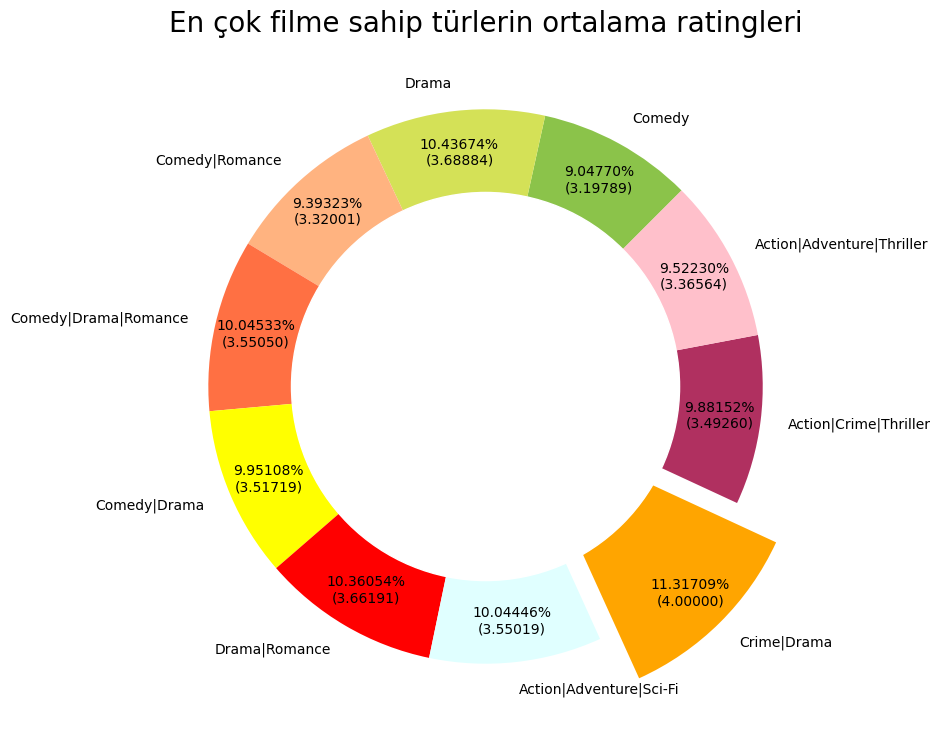

In [17]:
#en çok filmi olan türlerden ortalama ratingi en fazla olan Crime|Drama kategorisidir.
plt.figure(figsize = (9,9))
area = [3.197888,3.688841, 3.320015,3.550500,3.517187,3.661910,3.550191,4.000000,3.492600,3.365636]
labels = ['Comedy', 'Drama', 'Comedy|Romance', 'Comedy|Drama|Romance', 'Comedy|Drama', 'Drama|Romance', 'Action|Adventure|Sci-Fi', 'Crime|Drama', 'Action|Crime|Thriller', 'Action|Adventure|Thriller']
colors = ['#8BC34A', '#D4E157', '#FFB380', '#FF7043', 'yellow', 'red', '#e0ffff', 'orange', '#b03060', 'pink']
total = np.sum(area)

def val_per(x):
    return '{:.5f}%\n({:.5f})'.format(x, total*x/100)

plt.pie(area, labels = labels, colors = colors, startangle = 45, pctdistance = 0.85, autopct = val_per, explode = [0,0,0,0,0,0,0,0.2,0,0])
my_circle = plt.Circle((0, 0), 0.7, color = 'white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('En çok filme sahip türlerin ortalama ratingleri', fontsize=20)
plt.show()

<AxesSubplot:xlabel='rating', ylabel='Density'>

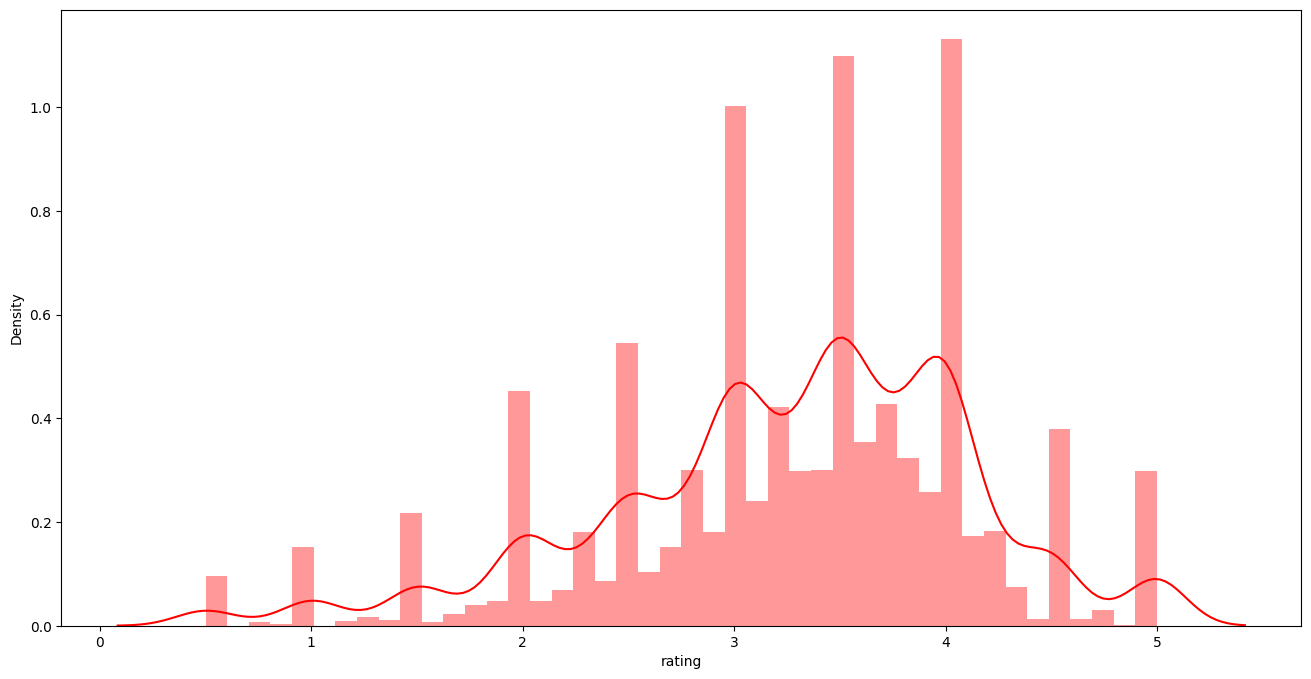

In [18]:
#filmlerin ortalamalarına dair 
plt.figure(figsize=(16,8))
sns.distplot(df2['rating'], kde=True, color='r')

In [19]:
movietable = df.pivot_table(index='userId',columns='title',values='rating')
movietable.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
type(movietable)

pandas.core.frame.DataFrame

In [21]:
#Forrest Gump filminin oy oranlarına bakıyoruz.
rating_ = movietable["Forrest Gump (1994)"]
rating_.head(10)

userId
1     4.0
2     NaN
3     NaN
4     NaN
5     NaN
6     5.0
7     5.0
8     3.0
9     NaN
10    3.5
Name: Forrest Gump (1994), dtype: float64

In [22]:
#Benzerliklerine bakmak için korelasyonlarını hesaplatıyoruz.Bazı kayıtlarda boşluklar olduğu için hata veriyor.
similar= movietable.corrwith(rating_)

In [23]:
# Korelasyonun 1 ve -1 arasında olduğunu görüyoruz, 1 uyumlu -1 uyumsuz olduğunu gösteriyor.
similar

title
'71 (2014)                                        NaN
'Hellboy': The Seeds of Creation (2004)           NaN
'Round Midnight (1986)                            NaN
'Salem's Lot (2004)                               NaN
'Til There Was You (1997)                         NaN
                                               ...   
eXistenZ (1999)                              0.011189
xXx (2002)                                   0.306817
xXx: State of the Union (2005)               0.383482
¡Three Amigos! (1986)                        0.449692
À nous la liberté (Freedom for Us) (1931)         NaN
Length: 9719, dtype: float64

In [24]:
corr_ = pd.DataFrame(similar, columns=['Correlation'])
corr_.dropna(inplace=True)
corr_.head()

,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


In [25]:
corr_.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Self/less (2015),1.0
Young People Fucking (a.k.a. YPF) (2007),1.0
"In Crowd, The (2000)",1.0
Shrek the Halls (2007),1.0
Highway 61 (1991),1.0
"Wind Rises, The (Kaze tachinu) (2013)",1.0
Impromptu (1991),1.0
"I, Frankenstein (2014)",1.0
World's Greatest Dad (2009),1.0


In [26]:
# corr_ dataframe'ine rating_oy_sayisi sütununu ekleyelim
#oy sayısı düşük olanlar tahmin sistemini yanıltabileceğinden oy adetleri ile de ilgilenilmelidir.
corr_ = corr_.join(df2['rating_oy_sayisi'])
corr_.head()

,Correlation,rating_oy_sayisi
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


In [27]:
corr_[corr_['rating_oy_sayisi']>100].sort_values('Correlation',ascending=False).head()

,Correlation,rating_oy_sayisi
title,,
Forrest Gump (1994),1.000000,329
Good Will Hunting (1997),0.484042,141
Aladdin (1992),0.464268,183
American History X (1998),0.457287,129
"Truman Show, The (1998)",0.432556,125


In [28]:
from tkinter import *
import tkinter as tk
from PIL import Image,ImageTk
from PIL import Image

In [29]:
#python için PIL yüklendi.

In [30]:
from tkinter import *
import tkinter as tk
from PIL import Image,ImageTk
import os
window = Tk()
window.title("Test")
window.geometry("1200x900")
window.config(bg = '#b03060')

lb_baslik=Label(text="Film Tavsiye Sistemi",font="Times 22 bold",fg="#b03060",width=50,bg="white")
lb_baslik.place(x=180,y=10)
lb_baslik=Label(text="Lütfen bir film seçiniz.",font="Times 10 italic", bg= 'white')
lb_baslik.place(x=30,y=50)

data=movies['title']
list=Listbox(window,height="30",width="45",bg="#dddddd",bd="2px",font="SansSerif",fg="black")
list.place(x=20,y=75)
label=Label()
label.place(x=450,y=110)

resim = ImageTk.PhotoImage(Image.open('/home/ilke/Downloads/pngegg (2).png'))

a=1
for i in data:
    list.insert(a,i)
    a=a+1


lb1=Label(text="")
lb1.place(x=470,y=125)
lb=Label(text="")
lb.place(x=460,y=165)

#Tavsiye işini yapacak olan metot
def metot():
    eleman=list.curselection()
    if(eleman):
        deger=list.get(eleman)
        lb1.configure(text=deger,font="Times 10 italic")
        label.configure(text="")
        ratings = movietable[deger]
        similar = movietable.corrwith(ratings)
        corr_ = pd.DataFrame(similar, columns=['Correlation'])
        corr_.dropna(inplace=True)
        corr_.sort_values('Correlation',ascending=False)
        df2.sort_values('rating',ascending=False)
        df2.sort_values('rating_oy_sayisi',ascending=False)
        corr_.sort_values('Correlation',ascending=False)
        corr_ = corr_.join(df2['rating_oy_sayisi'])
        corr_ = corr_.join(df2['rating'])
        text1=corr_[corr_['rating_oy_sayisi']>100].sort_values('Correlation',ascending=False).head()
        text1=text1.rename(columns={'title': 'Film', 'Correlation': 'Korelasyon'})
        lb.configure(text=text1, font="SansSerif 12",bg = "white",justify = RIGHT)
        
               
    else:
        label.configure(text="Lütfen seçim yapınız.")
                
b1=Button(text="Tavsiyeleri Göster",command=metot,bg="#F0681F",fg="pink")
button = Button(window, image= resim)
b1.place(x=450, y=75)
button.place(x=80, y=600)

window.mainloop()